# Estimating with DataExpansionFitter

## Estimation

In the following we apply the estimation method of Lee et al. (2018). Note that the data dataframe must not contain a column named 'C'.

In [4]:
from pydts.fitters import DataExpansionFitter
fitter = DataExpansionFitter()
fitter.fit(df=patients_df.drop(['C', 'T'], axis=1))

fitter.print_summary()



Model summary for event: 1
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    j_1   No. Observations:               536780
Model:                            GLM   Df Residuals:                   536745
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78272.
Date:                Tue, 12 Apr 2022   Deviance:                   1.5654e+05
Time:                        10:41:10   Pearson chi2:                 5.35e+05
No. Iterations:                     7   Pseudo R-squ. (CS):            0.01509
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
C(X)[1]       -0.9459  

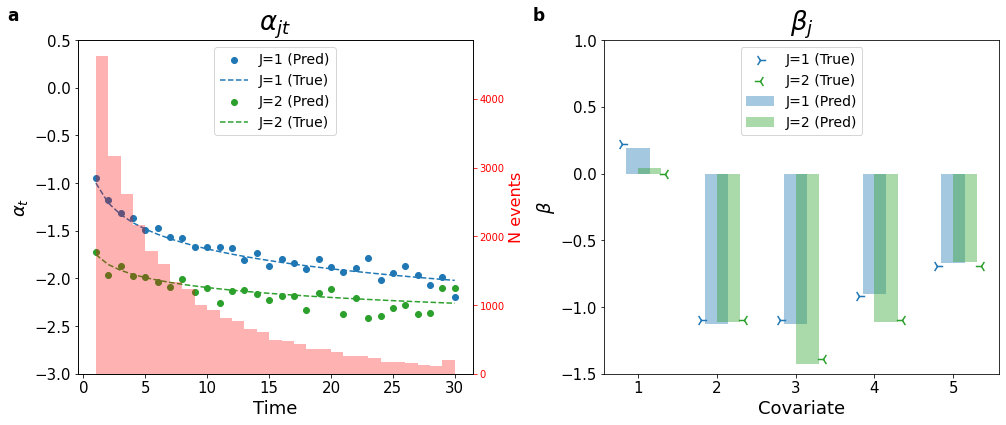

In [5]:
from pydts.examples_utils.plots import plot_first_model_coefs
plot_first_model_coefs(models=fitter.event_models, times=fitter.times, train_df=patients_df, n_cov=5)

## Prediction

Full prediction is given by the method predict_cumulative_incident_function()

The input is a pandas.DataFrame() containing for each observation the covariates columns which were used in the fit() method (Z1-Z5 in our example).

The following columns will be added:

1. The overall survival at each time point t
2. The hazard for each failure type $j$ at each time point t
3. The probability of event type $j$ at time t
4. The Cumulative Incident Function (CIF) of event type $j$ at time t

In the following, we provide predictions for the individuals with ID values (pid) 0, 1 and 2. We transposed the output for easy view.

In [6]:
pred_df = fitter.predict_cumulative_incident_function(
    patients_df.drop(['J', 'T', 'C', 'X'], axis=1).head(3)).set_index('pid').T
pred_df.index.name = ''
pred_df.columns = ['ID=0', 'ID=1', 'ID=2']
pred_df

,ID=0,ID=1,ID=2
,,,
Z1,0.548814,0.645894,0.791725
Z2,0.715189,0.437587,0.528895
Z3,0.602763,0.891773,0.568045
Z4,0.544883,0.963663,0.925597
Z5,0.423655,0.383442,0.071036
overall_survival_t1,0.942684,0.960628,0.932938
overall_survival_t2,0.899636,0.930545,0.883002
overall_survival_t3,0.861480,0.903726,0.839277
overall_survival_t4,0.827201,0.879254,0.800236
